In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2026-02-19 04:13:34--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2026-02-19 04:13:34--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2026-02-19 04:13:34 (5.70 MB/s) - ‘t

--- Exploratory Data Analysis ---


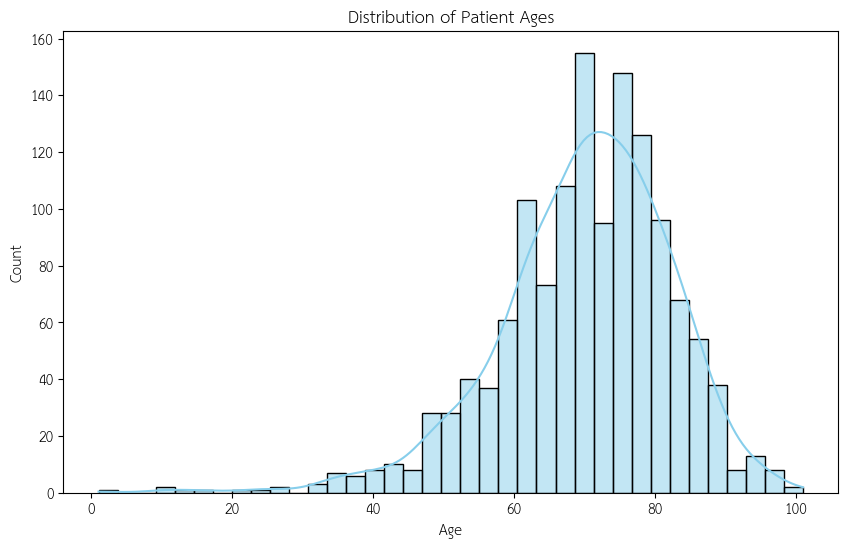

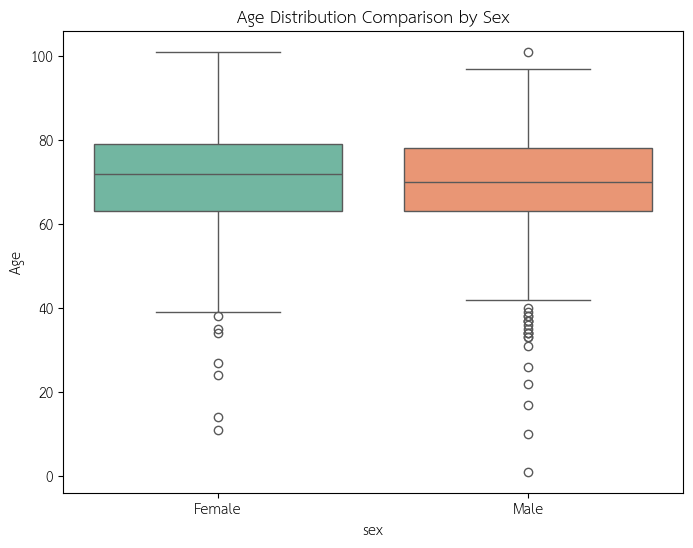

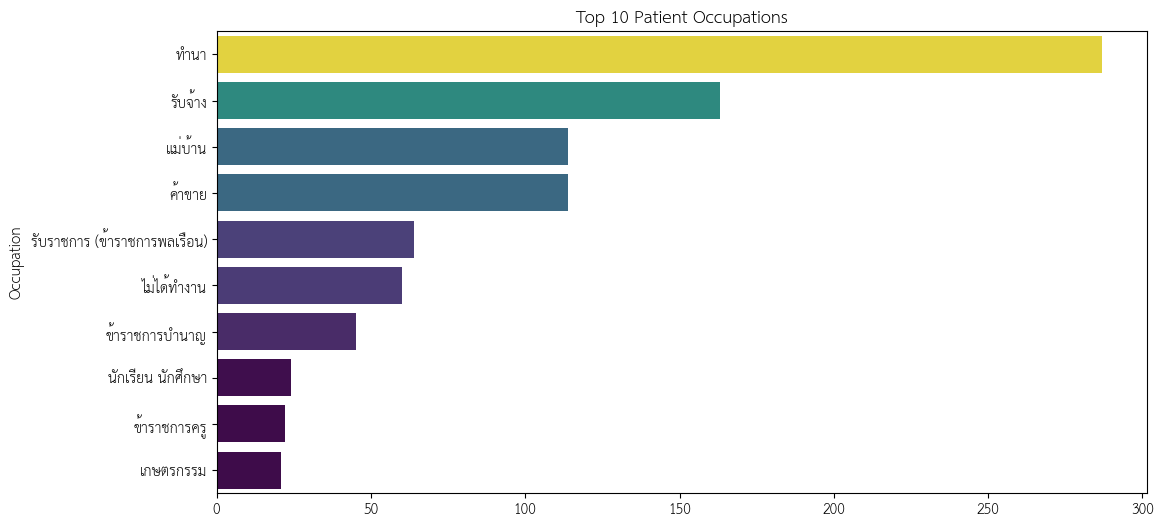


--- Descriptive Statistics ---
Mean Age: 70.05
Median Age: 71.00
Std Dev: 12.36
IQR: 15.00

--- Statistical Inference ---
95% Confidence Interval for Mean Age: (69.38, 70.71)
T-test (Male vs Female Age): t=-2.24, p-value=0.0252
Result: Statistically significant difference in age between genders.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

fm.fontManager.addfont('thsarabunnew-webfont.ttf')
plt.rc('font', family='TH Sarabun New')

def load_and_clean_data(file_path):
    """Loads and preprocesses the healthcare dataset."""
    # 1. Load Data (handling potential encoding issues)
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
    except:
        df = pd.read_csv(file_path, encoding='tis-620')

    # 2. Column Renaming
    # Rename the long physical exam header for easier access
    df = df.rename(columns={df.columns[-1]: 'PE_Findings'})

    # 3. Date Conversion (Buddhist Era to Gregorian)
    def convert_thai_date(date_int):
        try:
            date_str = str(date_int)
            year_be = int(date_str[:4])
            month = int(date_str[4:6])
            day = int(date_str[6:])
            year_ad = year_be - 543
            return pd.Timestamp(year=year_ad, month=month, day=day)
        except:
            return pd.NaT

    df['Date'] = df['วันที่'].apply(convert_thai_date)

    # 4. Cleaning Occupation (Handling '1' as a data issue)
    df['Occupation'] = df['Occupation'].astype(str).str.strip()
    # As identified, '1' is treated as a data entry error/issue
    df['Occupation'] = df['Occupation'].replace(['1', 'nan', 'NaN', 'NULL'], np.nan)

    # 5. Cleaning Sex
    df['sex'] = df['sex'].str.strip()
    sex_map = {'ญ': 'Female', 'ช': 'Male'}
    df['sex'] = df['sex'].map(sex_map)

    # 6. Handling Age Outliers
    # Note: Clinical logic suggests G20 (Parkinson's) is rare in children.
    # Records with Age < 18 are likely miscoded (verified via 'Symtom' field).
    # We keep them for transparency but flag them in EDA.

    return df

def perform_eda(df):
    """Generates visualizations and numerical distribution analysis."""

    print("--- Exploratory Data Analysis ---")

    # Age Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'], kde=True, color='skyblue')
    plt.title('Distribution of Patient Ages')
    plt.show()
    plt.close()

    # Age by Sex Comparison
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y='Age', data=df, palette='Set2', hue='sex', legend=False)
    plt.title('Age Distribution Comparison by Sex')
    plt.show()
    plt.close()

    # Top Occupations
    plt.figure(figsize=(12, 6))
    top_occ = df['Occupation'].value_counts().head(10)
    sns.barplot(x=top_occ.values, y=top_occ.index, palette='viridis', hue=top_occ.values, legend=False)
    plt.title('Top 10 Patient Occupations')
    plt.show()
    plt.close()

def perform_inference(df):
    """Performs descriptive statistics and hypothesis testing."""
    print("\n--- Descriptive Statistics ---")
    stats_summary = df['Age'].describe()
    iqr = stats_summary['75%'] - stats_summary['25%']
    print(f"Mean Age: {stats_summary['mean']:.2f}")
    print(f"Median Age: {stats_summary['50%']:.2f}")
    print(f"Std Dev: {stats_summary['std']:.2f}")
    print(f"IQR: {iqr:.2f}")

    print("\n--- Statistical Inference ---")
    # 95% Confidence Interval for Age
    ci_low, ci_high = stats.t.interval(0.95, len(df['Age'])-1,
                                      loc=df['Age'].mean(),
                                      scale=stats.sem(df['Age']))
    print(f"95% Confidence Interval for Mean Age: ({ci_low:.2f}, {ci_high:.2f})")

    # T-test: Mean Age difference between Male and Female
    male_age = df[df['sex'] == 'Male']['Age'].dropna()
    female_age = df[df['sex'] == 'Female']['Age'].dropna()
    t_stat, p_val = stats.ttest_ind(male_age, female_age, equal_var=False)

    print(f"T-test (Male vs Female Age): t={t_stat:.2f}, p-value={p_val:.4f}")
    if p_val < 0.05:
        print("Result: Statistically significant difference in age between genders.")
    else:
        print("Result: No statistically significant difference in age between genders.")

if __name__ == "__main__":
    file_name = 'G_2568.xlsx - Sheet1.csv'
    data = load_and_clean_data(file_name)
    perform_eda(data)
    perform_inference(data)